# Impact

In [1]:
# to import gammaALPs, this cell should be only executed once after kernel restart
%cd ..
%cd ..

/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs/notebooks
/mnt/c/Users/friba/Desktop/Bachelorarbeit/gammaALPs


/home/flandgraf/.local/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from gammaALPs.core import Source, ALP, ModuleList
from gammaALPs.base import environs, transfer
import numpy as np
import matplotlib.pyplot as plt

import healpy as hp
import time

fatal: No names found, cannot describe anything.


In [136]:
plt.rcParams['lines.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['font.size'] = 12
plt.rcParams['xtick.major.size'] = 4
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['ytick.major.size'] = 10
plt.rcParams['ytick.major.width'] = 2
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.minor.width'] = 1

In [266]:
EGeV = np.logspace(-1., 3.5, 101)  # the energy range, roughly matching the Fermi-LAT energy range (100 MeV - 500 GeV)
src = Source(z=0.017559, ra='03h19m49.9s', dec='+41d30m49.2s')  # position of NGC 1275
pa_in = np.diag([0., 0., 1.])  # the inital polarization matrix; a pure ALP state

m1 = 0.5
m2 = 10.
m3 = 20.
g = 0.4

ml1 = [ModuleList(ALP(m=m1, g=g), src, pin=pa_in, EGeV=EGeV, seed=0) for i in range(10)]
ml2 = [ModuleList(ALP(m=m2, g=g), src, pin=pa_in, EGeV=EGeV, seed=0) for i in range(10)]
ml3 = [ModuleList(ALP(m=m3, g=g), src, pin=pa_in, EGeV=EGeV, seed=0) for i in range(10)]

models = ['base', 'expX', 'neCL', 'twistX', 'nebCor', 'cre10', 'synCG', 'spur']
for i in range(8):
    ml1[i].add_propagation("GMF", 0, model='UF23', UF23_model=models[i])
    ml2[i].add_propagation("GMF", 0, model='UF23', UF23_model=models[i])
    ml3[i].add_propagation("GMF", 0, model='UF23', UF23_model=models[i])

ml1[8].add_propagation("GMF", 0, model="jansson12")
ml1[9].add_propagation("GMF", 0, model="pshirkov")

ml2[8].add_propagation("GMF", 0, model="jansson12")
ml2[9].add_propagation("GMF", 0, model="pshirkov")

ml3[8].add_propagation("GMF", 0, model="jansson12")
ml3[9].add_propagation("GMF", 0, model="pshirkov")

environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using inputted chi
environs.py:1207 --- INFO: Using i

In [267]:
px1, py1, pa1 = np.zeros((3, 10, EGeV.size))
px2, py2, pa2 = np.zeros((3, 10, EGeV.size))
px3, py3, pa3 = np.zeros((3, 10, EGeV.size))
for i in range(10):
    px1[i], py1[i], pa1[i] = ml1[i].run()
    px2[i], py2[i], pa2[i] = ml2[i].run()
    px3[i], py3[i], pa3[i] = ml3[i].run()

   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.base.environs.MixGMF'>
   core.py: 658 --- INFO: Running Module 0: <class 'gammaALPs.bas

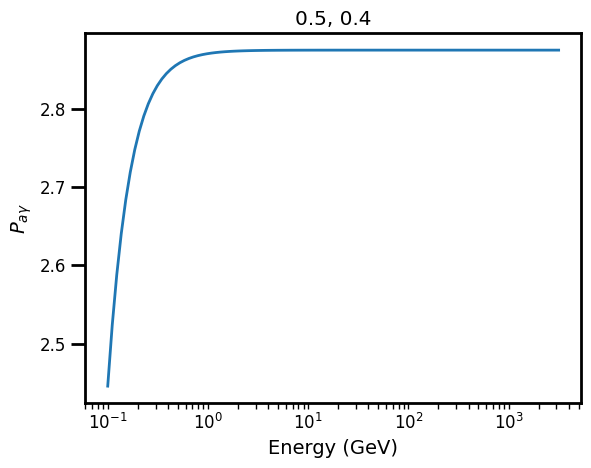

In [268]:
i=8
b=2
plt.semilogx(EGeV, (px1[i]+py1[i])/(px1[b] + py1[b]), lw = 2)
# plt.semilogx(EGeV, (px[2] + py[2]), lw = 2)
plt.xlabel("Energy (GeV)")
plt.ylabel(r"$P_{a\gamma}$")
plt.title(f"{m1}, {g}")

#plt.ylim(0.039, 0.08)
#plt.ylim(0, 1.2)
plt.show()

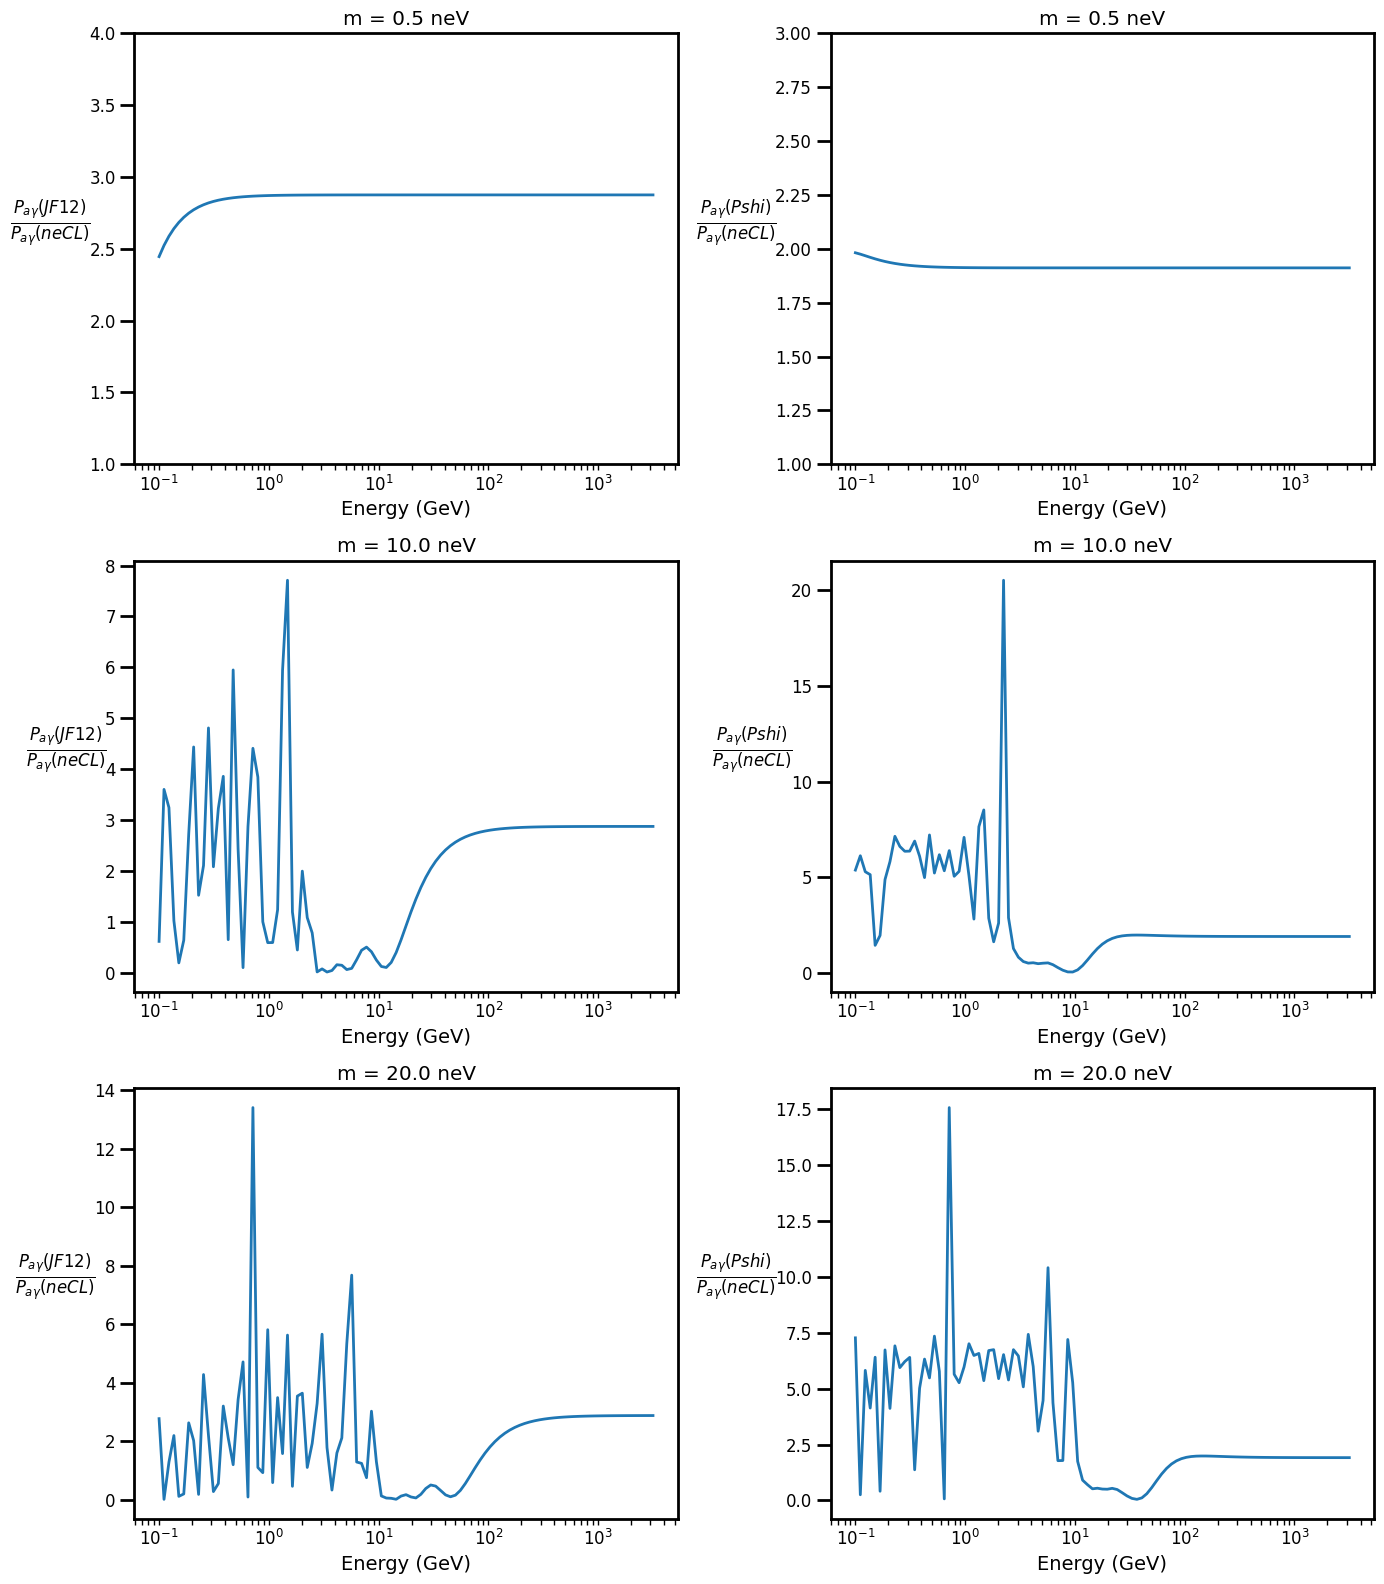

In [274]:
fig, axs = plt.subplots(3,2, figsize=(14, 16)) 
i=8
j=9
b=2
lp=28

axs[0,0].set_title(f'm = {m1} neV')
axs[0,0].semilogx(EGeV, (px1[i]+py1[i])/(px1[b] + py1[b]), lw = 2)
axs[0,0].set_ylabel(r"$\frac{P_{a\gamma}(JF12)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[0,0].set_xlabel("Energy (GeV)")
axs[0,0].set_ylim(1,4)

axs[0,1].set_title(f'm = {m1} neV')
axs[0,1].semilogx(EGeV, (px1[j]+py1[j])/(px1[b] + py1[b]), lw = 2)
axs[0,1].set_ylabel(r"$\frac{P_{a\gamma}(Pshi)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[0,1].set_xlabel("Energy (GeV)")
axs[0,1].set_ylim(1,3)

axs[1,0].set_title(f'm = {m2} neV')
axs[1,0].semilogx(EGeV, (px2[i]+py2[i])/(px2[b] + py2[b]), lw = 2)
axs[1,0].set_ylabel(r"$\frac{P_{a\gamma}(JF12)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[1,0].set_xlabel("Energy (GeV)")

axs[1,1].set_title(f'm = {m2} neV')
axs[1,1].semilogx(EGeV, (px2[j]+py2[j])/(px2[b] + py2[b]), lw = 2)
axs[1,1].set_ylabel(r"$\frac{P_{a\gamma}(Pshi)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[1,1].set_xlabel("Energy (GeV)")

axs[2,0].set_title(f'm = {m3} neV')
axs[2,0].semilogx(EGeV, (px3[i]+py3[i])/(px3[b] + py3[b]), lw = 2)
axs[2,0].set_ylabel(r"$\frac{P_{a\gamma}(JF12)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[2,0].set_xlabel("Energy (GeV)")

axs[2,1].set_title(f'm = {m3} neV')
axs[2,1].semilogx(EGeV, (px3[j]+py3[j])/(px3[b] + py3[b]), lw = 2)
axs[2,1].set_ylabel(r"$\frac{P_{a\gamma}(Pshi)}{P_{a\gamma}(neCL)}$", rotation=0, fontsize=17, labelpad=lp)
axs[2,1].set_xlabel("Energy (GeV)")

#for ax in axs.flat:
#    ax.set_ylim(0,3)
fig.tight_layout()
#plt.savefig('notebooks/UF23/plots/Effect/1_ngc_neCL.png')
plt.show()